# 图像基本概念及I/O

该记事本主要包括了图像的基本概念的相关练习以及基于OpenCV库的图像的基本操作

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 图像基本读写

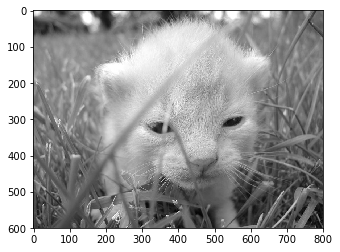

In [9]:
# 从文件中读入并显示灰度图像
gray_img = cv2.imread('./images/white.jpg', 0)
plt.imshow(gray_img, cmap='gray')

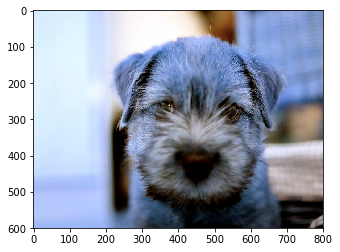

In [10]:
# 从文件中读入并显示彩色图像
color_img = cv2.imread('./images/black.jpg', 1)
plt.imshow(color_img)

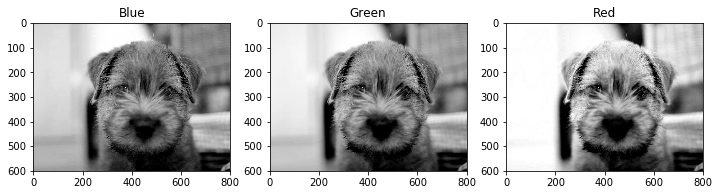

In [11]:
plt.figure(figsize = (12,12))
plt.subplot(131)
plt.imshow(color_img[:,:,0], cmap='gray')
plt.title('Blue')
plt.subplot(132)
plt.imshow(color_img[:,:,1], cmap='gray')
plt.title('Green')
plt.subplot(133)
plt.imshow(color_img[:,:,2], cmap='gray')
plt.title('Red')

In [7]:
# 辅助图像显示
def displayImg(img, img_type):
    if img_type == 'gray':
        plt.imshow(img, cmap = 'gray')
    elif img_type == 'color':
        plt.imshow(img[:,:,::-1])
    else:
        print "ERROR"

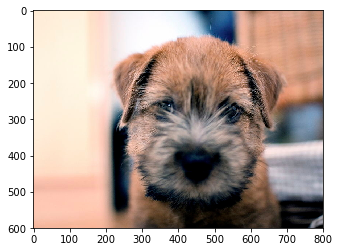

In [12]:
displayImg(color_img, 'color')

In [14]:
cv2.imwrite('./output/color_img.jpg', color_img)
cv2.imwrite('./output/gray_img.jpg', gray_img)

True

## 2. 图像文件基本信息

In [16]:
img = np.copy(color_img)
print 'image type:', type(img)
print 'Image Pixel type', img.dtype

 image type: <type 'numpy.ndarray'>
Image Pixel type uint8


In [17]:
img_dims = img.ndim
img_shape = img.shape
img_size = img.size

print "\n{:^70}".format("NDARRAY ATTRIBUTES")
print "{:^70}\n".format("====================")
print "{:^30}{:^20}{:^20}".format("Description", "Example", "Value")
print "{:^30}{:^20}{:^20}".format("-------------", "---------", "-------")
print "{:^30}{:^20}{:^20}".format("Number of dimensions", "img.ndim", img_dims)
print "{:^30}{:^20}{:^20}".format("Image Shape", "img.shape", img_shape)
print "{:^30}{:^20}{:^20}".format("Pixel count", "img.size", img_size)


                          NDARRAY ATTRIBUTES                          

         Description                Example              Value        
        -------------              ---------            -------       
     Number of dimensions           img.ndim               3          
         Image Shape               img.shape         (600, 800, 3)    
         Pixel count                img.size            1440000       


## 3. 图像文件的索引和选取

In [18]:
img[37][73]

array([219, 240, 255], dtype=uint8)

In [23]:
img = gray_img
img[0:3, img.shape[1]-4:]

array([[117, 114, 109, 105],
       [116, 114, 109, 105],
       [117, 115, 111, 108]], dtype=uint8)

In [24]:
img[0:3, img.shape[1]-4:] = 0

In [25]:
img

array([[209, 209, 208, ...,   0,   0,   0],
       [216, 215, 214, ...,   0,   0,   0],
       [223, 222, 221, ...,   0,   0,   0],
       ..., 
       [ 30,  30,  57, ...,  66,  95, 105],
       [ 28,  28,  56, ...,  42,  75, 102],
       [ 26,  26,  55, ...,  21,  56,  97]], dtype=uint8)

In [26]:
gray_img

array([[209, 209, 208, ...,   0,   0,   0],
       [216, 215, 214, ...,   0,   0,   0],
       [223, 222, 221, ...,   0,   0,   0],
       ..., 
       [ 30,  30,  57, ...,  66,  95, 105],
       [ 28,  28,  56, ...,  42,  75, 102],
       [ 26,  26,  55, ...,  21,  56,  97]], dtype=uint8)

In [27]:
mask = np.zeros(img.shape, dtype=bool)
mask[:3, :4] = True
print img[mask]

[209 209 208 207 216 215 214 213 223 222 221 220]


In [28]:
print img.min()
print img.max()

0
255


## 4. 图像的基本操作

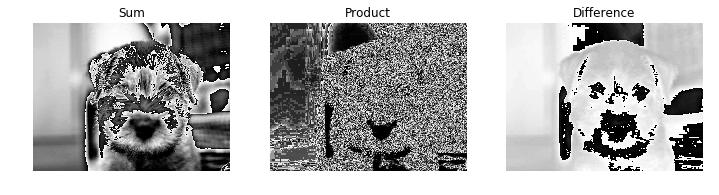

In [29]:
bluePlusGreen = color_img[:, :, 0] + color_img[:, :, 1]
redTimesBlue = color_img[:, :, 2] * color_img[:, :, 0]
greenMinusRed = color_img[:, :, 1] - color_img[:, :, 2]

plt.figure(figsize=(12, 6))
plt.subplot(131); plt.imshow(bluePlusGreen, cmap="gray"); plt.axis("off"); plt.title("Sum");
plt.subplot(132); plt.imshow(redTimesBlue, cmap="gray"); plt.axis("off"); plt.title("Product");
plt.subplot(133); plt.imshow(greenMinusRed, cmap="gray"); plt.axis("off"); plt.title("Difference");

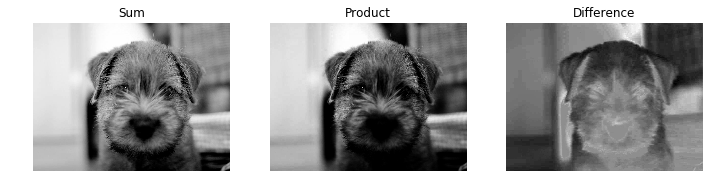

In [30]:
_img = color_img.astype(float)
bluePlusGreen = _img[:, :, 0] + _img[:, :, 1]
redTimesBlue = _img[:, :, 2] * _img[:, :, 0]
greenMinusRed = _img[:, :, 1] - _img[:, :, 2]

plt.figure(figsize=(12, 6))
plt.subplot(131); plt.imshow(bluePlusGreen, cmap="gray"); plt.axis("off"); plt.title("Sum");
plt.subplot(132); plt.imshow(redTimesBlue, cmap="gray"); plt.axis("off"); plt.title("Product");
plt.subplot(133); plt.imshow(greenMinusRed, cmap="gray"); plt.axis("off"); plt.title("Difference");

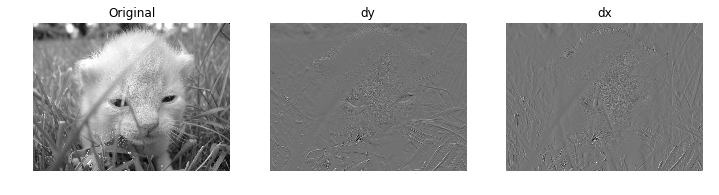

In [31]:
dy, dx = np.gradient(img.astype(float))
plt.figure(figsize=(12, 6));
plt.subplot(131); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(132); plt.imshow(dy, cmap="gray"); plt.axis("off"); plt.title("dy");
plt.subplot(133); plt.imshow(dx, cmap="gray"); plt.axis("off"); plt.title("dx");

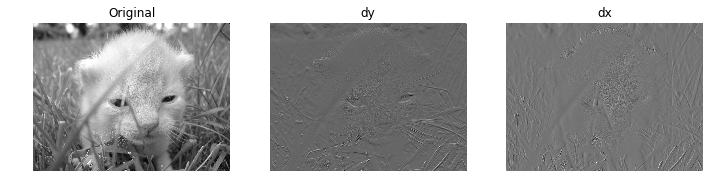

In [32]:
dy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
dx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
plt.figure(figsize=(12, 6));
plt.subplot(131); plt.imshow(img, cmap="gray"); plt.axis("off"); plt.title("Original");
plt.subplot(132); plt.imshow(dy, cmap="gray"); plt.axis("off"); plt.title("dy");
plt.subplot(133); plt.imshow(dx, cmap="gray"); plt.axis("off"); plt.title("dx");

In [ ]:
img = cv2.imread('opencv_logo.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()
#img = cv2.GaussianBlur(img, (3,3), 0)
#median = cv2.medianBlur(img,5)

In [49]:
black_img = cv2.imread('./images/black.jpg').astype(float)
white_img = cv2.imread('./images/white.jpg').astype(float)
alpha = cv2.imread('./images/mask.jpg').astype(float)
alpha = cv2.GaussianBlur(alpha, (51,51), 0)
alpha = alpha/255.

rows, cols = black_img.shape[:2]
foreground = alpha*black_img
background = (1.0 - alpha)*white_img

outImg = foreground + background
cv2.imwrite('./output/blend.jpg', outImg)

True